## 1  numpy 实现简单的RNN

Q1: RNN 本质上是什么？  
A1：循环的前馈网络（for循环即可实现）

In [2]:
import numpy as np

time_steps = 100  ## s输入序列的时间步数
input_features = 32  # 输入特征空间的维度，表示词向量的维度
out_features = 64  # 输出空间的维度， 表示输出神经单元的维度

inputs = np.random.random((time_steps,input_features))  # 输入数据，随机的噪声，只是演示

In [3]:
inputs.shape

(100, 32)

In [4]:
state_t = np.zeros((out_features,))  # 初始状态：全零向量

In [5]:
W = np.random.random((out_features, input_features))
U = np.random.random((out_features, out_features))
b = np.random.random((out_features,))

上述是要学习的矩阵，可以表示为以下的公式：  
> $$ h_{t} =  W_{100x64}*X_{64x32} + U_{64x64}* h_{t-1} + b_{64,}$$

In [6]:
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) +b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)

In [9]:
final_output_sequence.shape

(100, 64)

In [15]:
np.stack([np.array([1,2,3]),np.array([3,4,5])])

array([[1, 2, 3],
       [3, 4, 5]])

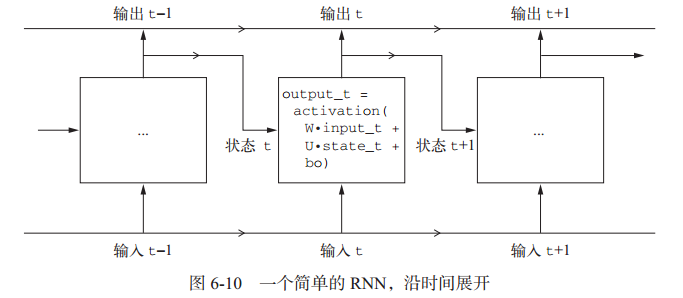

## 2 keras SimpleRNN

keras的SimpleRNN与上述不一样的地方就是可以处理序列批量。不再使用for循环来写，底层应该还是for循环

In [17]:
from tensorflow.keras import layers

In [18]:
from tensorflow.keras import Sequential

In [21]:
model = Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


##### 上面只返回最终状态，下面是返回每个timestep的状态，

In [22]:
model2 = Sequential()
model2.add(layers.Embedding(10000, 32))
model2.add(layers.SimpleRNN(32, return_sequences=True))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


##### 接下来搞明白循环层的叠加问题

In [26]:
model3 = Sequential()
model3.add(layers.Embedding(10000, 32))
model3.add(layers.SimpleRNN(32, return_sequences=True))
model3.add(layers.SimpleRNN(32, return_sequences=True))
model3.add(layers.SimpleRNN(32, return_sequences=True))
model3.add(layers.SimpleRNN(32))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


#### 使用SimpleRNN进行训练

In [27]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [28]:
max_features = 10000
maxlen = 500
batch_size = 32

In [29]:
(input_train, y_train),(input_test, y_test) = imdb.load_data(
num_words=max_features)

In [30]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [31]:
from tensorflow.keras.layers import Dense

In [34]:
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [36]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.6690 - acc: 0.5724 - val_loss: 0.6075 - val_acc: 0.6652
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.4406 - acc: 0.8055 - val_loss: 0.3886 - val_acc: 0.8388
Epoch 3/10
20000/20000 [==============================] - 20s 1ms/sample - loss: 0.3239 - acc: 0.8689 - val_loss: 0.3551 - val_acc: 0.8504
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.2453 - acc: 0.9058 - val_loss: 0.4116 - val_acc: 0.8184
Epoch 5/10
20000/20000 [==============================] - 20s 979us/sample - loss: 0.1896 - acc: 0.9290 - val_loss: 0.3850 - val_acc: 0.8496
Epoch 6/10
20000/20000 [==============================] - 20s 979us/sample - loss: 0.1367 - acc: 0.9517 - val_loss: 0.4642 - val_acc: 0.8100
Epoch 7/10
20000/20000 [==============================] - 20s 982us/sample - loss: 0.0895 - acc: 0.9704 - val_los

In [38]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [39]:
epochs = range(1, len(acc)+1)

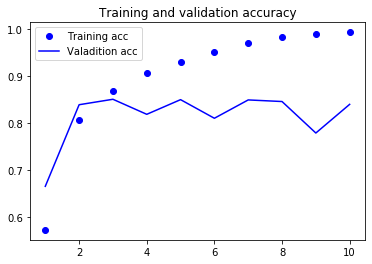

In [45]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Valadition acc')
plt.title('Training and validation accuracy')
plt.legend()

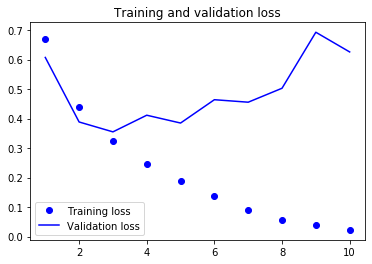

In [46]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### LSTM

LSTM解决的2大问题：
（1）梯度消失（迭代层中数字太小导致）
（2）梯度爆炸（迭代层中有较大的传递）

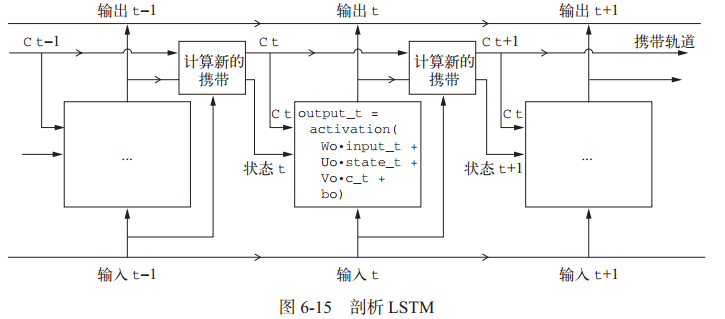

LSTM的网络基础结构与RNN相同，但是在SimpleRNN上添加了遗忘门、更新门，更对输出门做了更改。

$$f_t = W_f*[h_{t-1}, X_t]$$
$$i_t = W_i*[h_{t-1}, X_t]$$
$$k_t = W_k*[h_{t-1}, X_t]$$

$\sigma(f_t), \sigma(i_t), \sigma(k_t)$分别代表从$C_{t-1}、i_t$中获取应该保留和遗忘的信息。

$$C_t = C_{t-1}*\sigma(f_t)+\sigma(i_t)* \tanh(W_c*[h_{t-1},X_t])$$

$$h_t = \sigma(f_t)~~*~\tanh(C_t)$$  ## 遗忘carry中的数据

###### keras中LSTM的具体的例子

In [49]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

In [51]:
Model = Sequential()
Model.add(Embedding(max_features, 32))
Model.add(LSTM(32))
Model.add(Dense(1, activation='sigmoid'))
Model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [52]:
history = Model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 77s 4ms/sample - loss: 0.5136 - acc: 0.7545 - val_loss: 0.3588 - val_acc: 0.8598
Epoch 2/10
20000/20000 [==============================] - 76s 4ms/sample - loss: 0.2927 - acc: 0.8874 - val_loss: 0.5413 - val_acc: 0.8166
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/sample - loss: 0.2326 - acc: 0.9126 - val_loss: 0.3071 - val_acc: 0.8694
Epoch 4/10
20000/20000 [==============================] - 75s 4ms/sample - loss: 0.1989 - acc: 0.9273 - val_loss: 0.3561 - val_acc: 0.8842
Epoch 5/10
20000/20000 [==============================] - 75s 4ms/sample - loss: 0.1798 - acc: 0.9338 - val_loss: 0.2926 - val_acc: 0.8946
Epoch 6/10
20000/20000 [==============================] - 78s 4ms/sample - loss: 0.1545 - acc: 0.9449 - val_loss: 0.3480 - val_acc: 0.8872
Epoch 7/10
20000/20000 [==============================] - 75s 4ms/sample - loss: 0.1418 - acc: 0.9500 - val_loss: 0.4

适用于评论分析全局的长期性结构（这正是 LSTM 所擅长的），对情感分析问题帮助不大。

###### LSTM的高级用法

（1）循环dropout   --- reduce overfit

In [55]:
import os

In [58]:
fname = './jena_climate_2009_2016.csv'
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [65]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

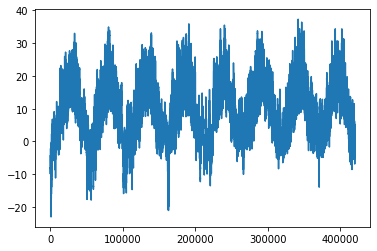

In [66]:
temp = float_data[:,1]  # 温度 （单位：摄氏度）
plt.plot(range(len(temp)), temp)

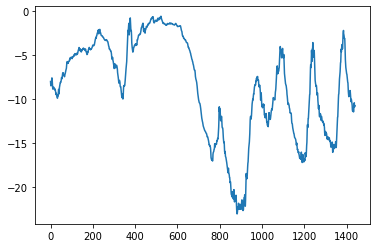

In [67]:
plt.plot(range(1440), temp[:1440])

In [68]:
#### y预处理

In [69]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

数据生成器，  
data 浮点型数据组成的原始数组，并进行标准化  
lookback 输入数据应该包括多少个时间步  
delay 目标应该在未来多少个时间步之后  
min_index和max_index： data数组中的索引，用于界定需要抽取哪些时间步，这有助于保存一部分数据用于验证、另一部分用于测试  
shuffle 打乱赝本  
batch_size 每个批量的样本数  
step 数据蔡洋的周期。我们将其设置为6。要每小时抽取一个数据点。

In [79]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [80]:
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0,
                     max_index=200000, shuffle=True, step=step, batch_size=batch_size)

val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001,
                   max_index=300000,step=step, batch_size=batch_size)

test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001,
                    max_index=None, step=step, batch_size=batch_size)

val_steps = (300000 - 200001 -lookback) // batch_size

test_steps = (len(float_data) - 300001 - lookback) // batch_size

###### 先使用符合常识的基准方法描述MAE

In [81]:
def evalation_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

evalation_naive_method()

0.2897359729905486


得到的 MAE 为 0.29。因为温度数据被标准化成均值为 0、标准差为 1，所以无法直接对这
个值进行解释。它转化成温度的平均绝对误差为 0.29×temperature_std 摄氏度，即 2.57℃。

In [84]:
from tensorflow.keras.optimizers import RMSprop
model5 = Sequential()
model5.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model5.add(layers.Dense(32, activation='relu'))
model5.add(layers.Dense(1))

model5.compile(optimizer=RMSprop(), loss='mae', metrics = ['acc'])
history = model5.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 17s 35ms/step - loss: 1.6056 - acc: 0.0000e+00 - val_loss: 0.8094 - val_acc: 0.0000e+00
Epoch 2/20
500/500 [==============================] - 17s 34ms/step - loss: 0.6023 - acc: 0.0000e+00 - val_loss: 0.4447 - val_acc: 0.0000e+00
Epoch 3/20
500/500 [==============================] - 17s 34ms/step - loss: 0.3264 - acc: 0.0000e+00 - val_loss: 0.3229 - val_acc: 0.0000e+00
Epoch 4/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2793 - acc: 0.0000e+00 - val_loss: 0.3252 - val_acc: 0.0000e+00
Epoch 5/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2611 - acc: 0.0000e+00 - val_loss: 0.3103 - val_acc: 0.0000e+00
Epoch 6/20
500/500 [==============================] - 19s 37ms/step - loss: 0.2490 - acc: 0.0000e+00 - val_loss: 0.3065 - val_acc: 0.0000e+00
Epoch 7/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2408 - acc: 0.0000e+00 - val_loss: 0.3111 - val_acc: 0.0000e+00
Epoch 

##### 采用普通全连接的算法，得到的loss大概是0.8, val_loss = 0.66

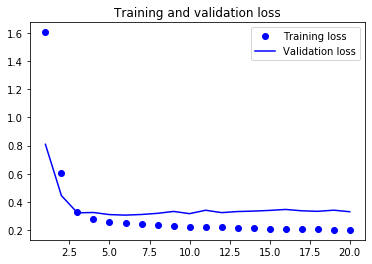

In [86]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 而且全连接的过拟合现象比较严重

In [87]:
#######  GRU

In [88]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=20,validation_data=val_gen,validation_steps=val_steps)

Using TensorFlow backend.


Epoch 1/20
500/500 [==============================] - 98s 196ms/step - loss: 0.3019 - val_loss: 0.1431
Epoch 2/20
500/500 [==============================] - 97s 193ms/step - loss: 0.2847 - val_loss: 0.1674
Epoch 3/20
500/500 [==============================] - 96s 193ms/step - loss: 0.2771 - val_loss: 0.1254
Epoch 4/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2717 - val_loss: 0.1487
Epoch 5/20
500/500 [==============================] - 97s 193ms/step - loss: 0.2685 - val_loss: 0.1661
Epoch 6/20
500/500 [==============================] - 97s 193ms/step - loss: 0.2635 - val_loss: 0.1425
Epoch 7/20
500/500 [==============================] - 97s 193ms/step - loss: 0.2611 - val_loss: 0.1888
Epoch 8/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2582 - val_loss: 0.2372
Epoch 9/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2520 - val_loss: 0.2005
Epoch 10/20
500/500 [==============================] - 97s 194ms/step - l

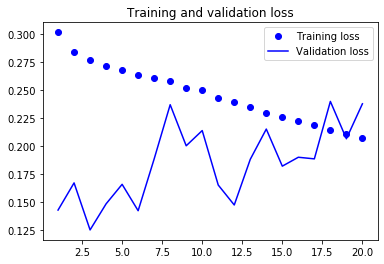

In [89]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

###### 能够看到添加采用RNN—GRU模型之后，loss下降的比之前要多，并且有效组织了过拟合

###### 添加DROPOUT正则化的GRU模型

In [94]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
dropout=0.1,
recurrent_dropout=0.5,
return_sequences=True,
input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
dropout=0.1,
recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=40,
validation_data=val_gen,
validation_steps=val_steps)

Epoch 1/40
 36/500 [=>............................] - ETA: 3:22 - loss: nan

KeyboardInterrupt: 

### 双向RNN的适用性 

每个RN分别沿一个方向对输入序列进行处理（时间正序和时间逆序），然后将他们的表示合并在一起（直接相加），通过沿这两个方向处理序列，双向的RNN能够捕捉到可能被单向RNN湖忽略的模式。

缺点：对于时间顺序受影响的，双向RNN并不会起到出色的结果

逆序 GRU 的效果甚至比基于常识的基准方法还要差很多，这说明在本例中，按时间正序处
理对成功解决问题很重要。这非常合理：GRU 层通常更善于记住最近的数据，而不是久远的数据，
与更早的数据点相比，更靠后的天气数据点对问题自然具有更高的预测能力（这也是基于常识
的基准方法非常强大的原因）。因此，按时间正序的模型必然会优于时间逆序的模型。重要的是，
对许多其他问题（包括自然语言）而言，情况并不是这样：直觉上来看，一个单词对理解句子
的重要性通常并不取决于它在句子中的位置。

#### 先建立一个逆序的LSTM

In [104]:
(x_train, y_train), (x_test, y_test) =imdb.load_data(
num_words=max_features)

In [106]:
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [111]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [124]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [126]:
model7 = Sequential()
model7.add(layers.Embedding(max_features, 128))

In [128]:
model7.add(layers.LSTM(32))
model7.add(layers.Dense(1, activation='sigmoid'))

model7.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model7.fit(x_train,y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.4895 - acc: 0.7678 - val_loss: 0.3562 - val_acc: 0.8564
Epoch 2/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.3107 - acc: 0.8806 - val_loss: 0.3757 - val_acc: 0.8538
Epoch 3/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2479 - acc: 0.9086 - val_loss: 0.3556 - val_acc: 0.8546
Epoch 4/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2093 - acc: 0.9236 - val_loss: 0.4603 - val_acc: 0.8556
Epoch 5/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1889 - acc: 0.9323 - val_loss: 0.4173 - val_acc: 0.8484
Epoch 6/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1759 - acc: 0.9377 - val_loss: 0.3524 - val_acc: 0.8736
Epoch 7/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1497 - acc: 0.9480 - val_loss: 0.5915 - val_acc:

这证实了一个假设：虽然单词顺序对理解语言很重要，但使用哪种顺
序并不重要。重要的是，在逆序序列上训练的 RNN 学到的表示不同于在原始序列上学到的表示，
正如在现实世界中，如果时间倒流（你的人生是第一天死去、最后一天出生），那么你的心智模
型也会完全不同。

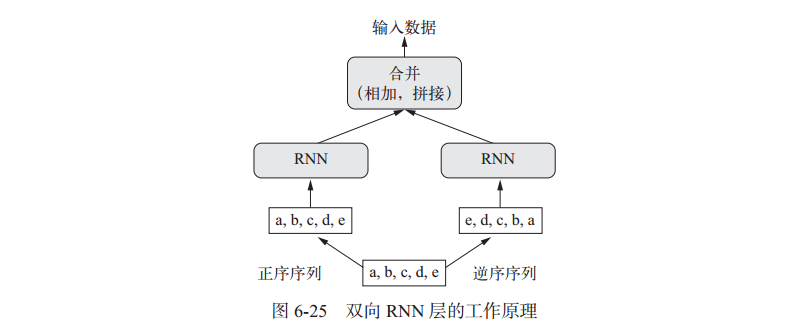

In [129]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.5300 - acc: 0.7402 - val_loss: 1.4193 - val_acc: 0.5114
Epoch 2/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.3606 - acc: 0.8648 - val_loss: 0.3741 - val_acc: 0.8718
Epoch 3/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.2726 - acc: 0.9008 - val_loss: 0.3589 - val_acc: 0.8802
Epoch 4/10
20000/20000 [==============================] - 116s 6ms/step - loss: 0.2356 - acc: 0.9107 - val_loss: 0.3312 - val_acc: 0.8808
Epoch 5/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.2072 - acc: 0.9247 - val_loss: 0.3409 - val_acc: 0.8854
Epoch 6/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1830 - acc: 0.9362 - val_loss: 0.4082 - val_acc: 0.8732
Epoch 7/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.1652 - acc: 0.9424 - val_loss: 0.3865 - v

#### 回调函数的使用callback

当检测到损失不再改善时就停止训练。callback可以做到。

回调函数的一些用法示例：  
> 1、模型检查点（model checkpointing）:在训练过程中的不同时间点保存模型的当前权重   
2、提前终止（early stopping）：如果验证损失不再改善，则中断训练（当然，同时3、保存在训练过程中的大的最佳模型）  
4、在训练过程中动态的调节某些参数值：比如优化器的学习率  
5、在训练过程中记录训练指标和验证指标，或者将模型学到的表示可视化（这些表示也在不断更新）


#### 对话机器人的流程系统

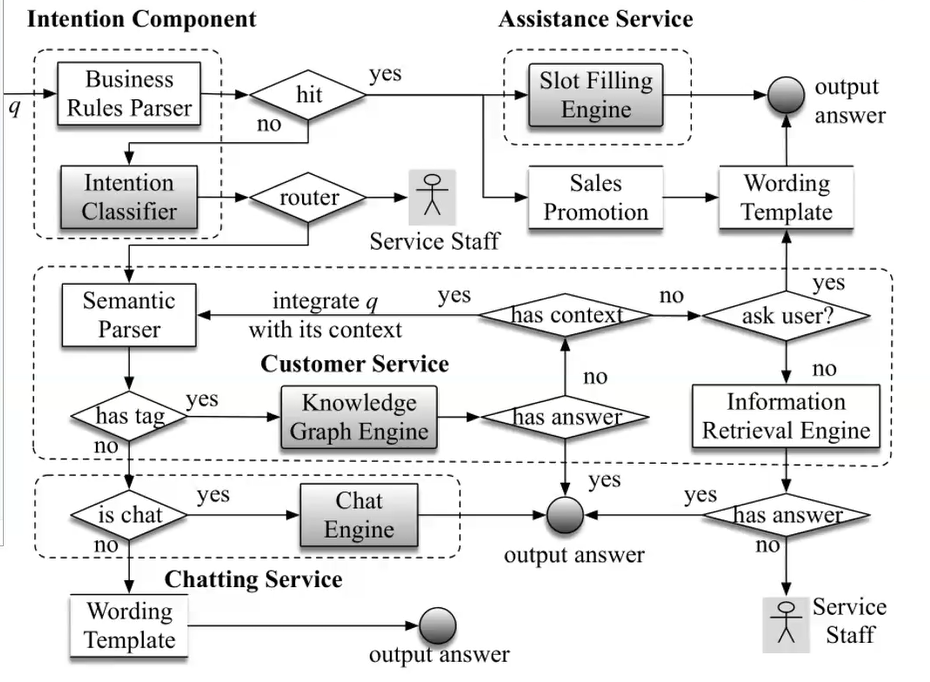